# Lesson 17 -  Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1: Linear Function

### Exercise 0 - Set up
- Save your own copy of this notebook by using the menu opetion File > Save As.
- Now, **refresh the page**. The red icon in the upper right should no longer be visible. 
- Run the code in the first cell below to load the packages that that we will use today.
- Run the code in the second cell below to load the data that we will be using. 

In [3]:
# load the dypyr and ggplot2 packages
library('dplyr')
library('ggplot2')

# Resizes all plots
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
# Load aritfical data
my_data <- read.csv('~/shared/data/artificial_data.csv')

### Exercise 1 - Plot Group 1
- Use a scatter plot to show how the group 1 values depend on the x values in `my_data`.
- Use `geom_smooth()` to add the line of best fit to your plot. 

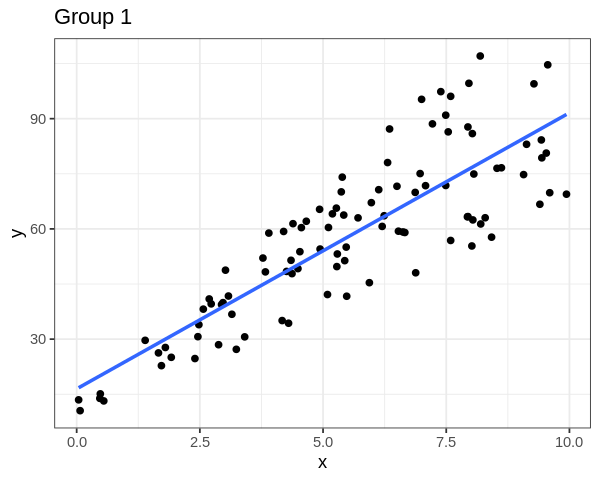

In [41]:
# Plot Group 1
ggplot(filter(my_data),
       aes(x=x_value, y=group_1)
      ) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 1", x = 'x', y= 'y') +
    theme_bw()

### Exercise 2 - Group 1 Prediction
- Use `lm()` to find the coefficients of the line of best fit for group 1. 
- Construct a function that use the best fit linear model to predict the value of group 1 based on the x value. 
- Use your function to predict the value of group 1 when the value of x is 5. 
- Use your plot from the previous exercise to check your result.

In [43]:
model_1 <- lm(formula = 'group_1 ~ x_value',  data = my_data)
C <- model_1$coefficients[[1]] 
A <- model_1$coefficients[[2]]

func_1 <- function(x) {
    A * x + C # Linear model
}

func_1(5) 

my_data %>% 
    filter(x_value >4.9 & x_value <5.1) %>%
    arrange(x_value) %>%
    select(x_value, group_1)

[1] 54.03447

x_value,group_1
<dbl>,<dbl>
4.93,65.33012
4.94,54.51854
5.09,42.13848


In [44]:
model_1


Call:
lm(formula = "group_1 ~ x_value", data = my_data)

Coefficients:
(Intercept)      x_value  
     16.470        7.513  


In [45]:
7.513 *(5) + 16.470 

[1] 54.035

## Part 2 - Group 2

### Exercise 3 - Plot Group 2
- Use a scatter plot to show how the group 2 values depend on the x values in `my_data`.
- Use the plot to chose a model: linear, quadratic, exponential growth, exponential decay. 
- Use `geom_smooth()` to add the curve of best fit to your plot. 

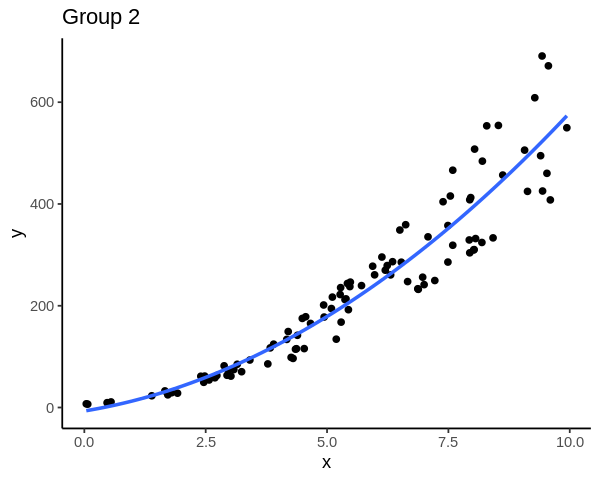

In [46]:
# Plot Group 2
ggplot(filter(my_data),
       aes(x=x_value, y=group_2)
      ) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ I(x^2) + x', se=FALSE) + 
    labs(title = "Group 2", x = 'x', y= 'y') +
    theme_classic()

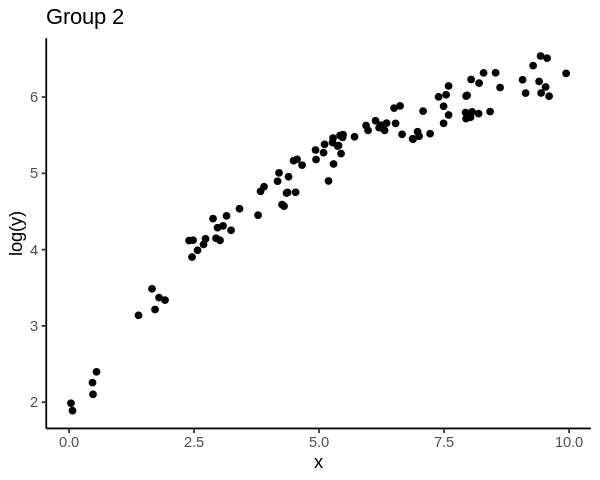

In [90]:
# Compare to log plot
ggplot(filter(my_data),
       aes(x=x_value, y=log(group_2))
      ) + 
    geom_point() +
    labs(title = "Group 2", x = 'x', y= 'log(y)') +
    theme_classic()

The log graph is NOT linear, so this is not exponential growth.

### Exercise 4 - Group 2 Prediction
- Use `lm()` to find the coefficients of the line of best fit for group 2. 
- Construct a function that use the best fit linear model to predict the value of group 2 based on the x value. 
- Use your function to predict the value of group 2 when the value of x is 5. 
- Use your plot from the previous exercise to check your result.

In [47]:
model_2 <- lm(formula = 'group_2 ~  x_value + I(x_value^2)',  data = my_data)
C <- model_2$coefficients[[1]] 
B <- model_2$coefficients[[2]]
A <- model_2$coefficients[[3]]

func_2 <- function(x) {
    A * x^2 + B * x + C # Quadratic model model
}

func_2(5) 

select(filter(my_data, x_value >4.9 & x_value <5.1), x_value, group_2)

[1] 178.8701

x_value,group_2
<dbl>,<dbl>
4.94,177.7902
5.09,194.5498
4.93,201.4904


In [48]:
model_2


Call:
lm(formula = "group_2 ~  x_value + I(x_value^2)", data = my_data)

Coefficients:
 (Intercept)       x_value  I(x_value^2)  
      -6.841        15.665         4.296  


In [49]:
4.296*5^2 + 15.665* 5 + -6.841 

[1] 178.884

## Part 3 - Group 3

### Exercise 5 - Plot Group 3
- Use a scatter plot to show how the group 3 values depend on the x values in `my_data`.
- Use the plot to chose a model: linear, quadratic, exponential growth, exponential decay. 
- Use `geom_smooth()` to add the curve of best fit to your plot. 

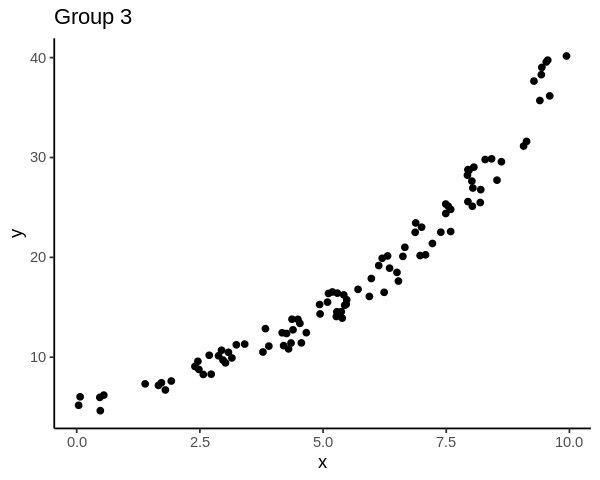

In [83]:
ggplot(filter(my_data),
       aes(x=x_value, y=group_3)
      ) + 
    geom_point() +
    labs(title = "Group 3", x = 'x', y= 'y') +
    theme_classic()

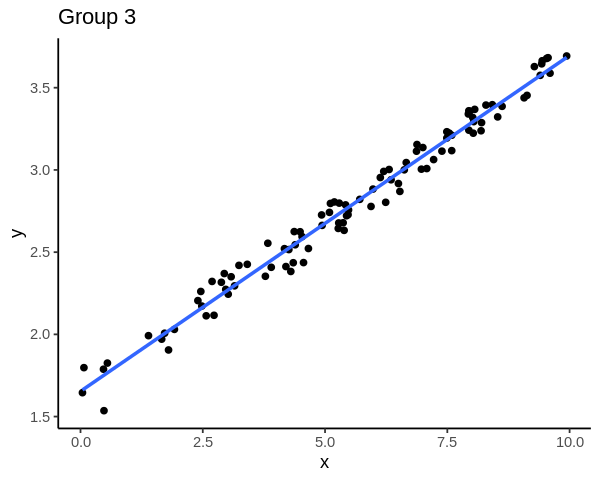

In [84]:
# Plot Group 3
ggplot(filter(my_data),
       aes(x=x_value, y=log(group_3)) # Note the log!
      ) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 3", x = 'x', y= 'y') +
    theme_classic()

### Exercise 6 - Group 3 Prediction
- Use `lm()` to find the coefficients of the line of best fit for group 3. 
- Construct a function that use the best fit linear model to predict the value of group 3 based on the x value. 
- Use your function to predict the value of group 3 when the value of x is 5. 
- Use your plot from the previous exercise to check your result.

In [87]:
model_3 <- lm(formula = 'log(group_3) ~ x_value',  data = my_data)
C <- model_3$coefficients[[1]] 
A <- model_3$coefficients[[2]]

func_3 <- function(x) {
    exp(A*x+C) # Exponential growth
}

func_3(5) 

my_data %>% 
    filter(x_value >4.9 & x_value <5.1) %>%
    arrange(x_value) %>%
    select(x_value, group_3)

[1] 14.51406

x_value,group_3
<dbl>,<dbl>
4.93,15.27723
4.94,14.33603
5.09,15.51585


In [88]:
model_3 


Call:
lm(formula = "log(group_3) ~ x_value", data = my_data)

Coefficients:
(Intercept)      x_value  
     1.6539       0.2043  


In [89]:
exp(0.2043*5 + 1.6539 )

[1] 14.51816

## Examples

### Example 1 -  Exponential Decay

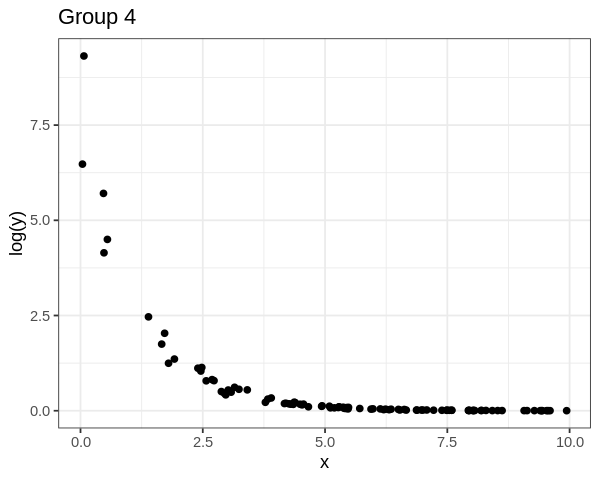

In [73]:
ggplot(filter(my_data),
       aes(x=x_value, y=group_4)
      ) + 
    geom_point() +
    labs(title = "Group 4", x = 'x', y= 'log(y)') +
    theme_bw()

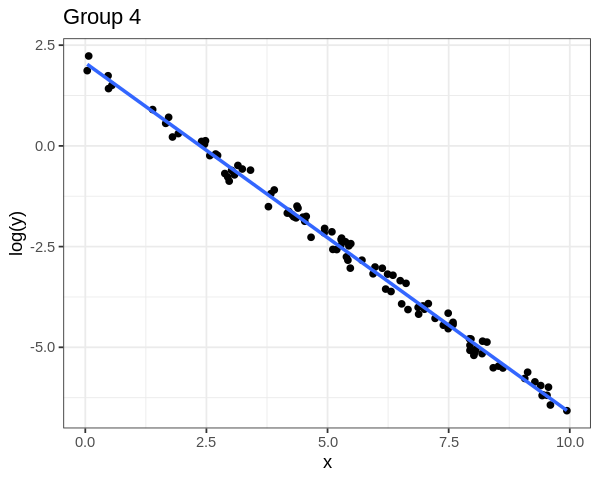

In [74]:
# Plot Group 4
ggplot(filter(my_data),
       aes(x=x_value, y=log(group_4)) # Note the log!
      ) + 
    geom_point() +
    geom_smooth(method = 'lm', formula = 'y ~ x', se=FALSE) + 
    labs(title = "Group 4", x = 'x', y= 'log(y)') +
    theme_bw()

In [75]:
model_4 <- lm(formula = 'log(group_4) ~ x_value',  data = my_data)
model_4


Call:
lm(formula = "log(group_4) ~ x_value", data = my_data)

Coefficients:
(Intercept)      x_value  
     2.0598      -0.8679  


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



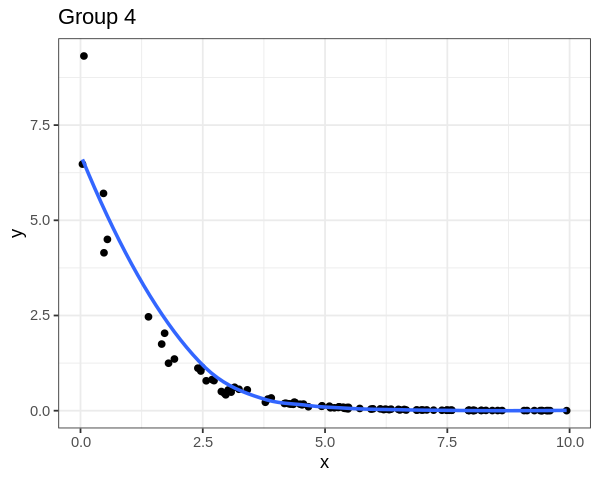

In [76]:
# Plot Group 4
ggplot(my_data, aes(x=x_value, y=group_4)) + 
    geom_point() +
    geom_smooth(mapping = aes(x=x_value, y=exp(model_4$fitted.values)), se=FALSE) + 
    labs(title = "Group 4", x = 'x', y= 'y') +
    theme_bw()

In [77]:
model_4 <- lm(formula = 'log(group_4) ~ x_value',  data = my_data)
C <- model_4$coefficients[[1]] 
A <- model_4$coefficients[[2]]

func_4 <- function(x) {
   exp(A*x + C) # Exponential decay
}

func_4(5) 

select(filter(my_data, x_value >4.9 & x_value <5.1), x_value, group_4)

[1] 0.102303

x_value,group_4
<dbl>,<dbl>
4.94,0.1289197
5.09,0.1184861
4.93,0.1157567


In [78]:
model_4


Call:
lm(formula = "log(group_4) ~ x_value", data = my_data)

Coefficients:
(Intercept)      x_value  
     2.0598      -0.8679  


In [79]:
exp(-0.8679  *5 + 2.0598)

[1] 0.1023149